In [ ]:
Введение в
машинное обучение.
метрики оценки
модели

In [ ]:
Accuracy:
реализация на Python

In [ ]:
Шаг 1: Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
Шаг 2: Загрузка и подготовка набора данных

In [2]:
from sklearn.datasets import load_iris

# Загрузить набор данных
iris = load_iris()
X, y = iris.data, iris.target
# Преобразование в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [ ]:
Шаг 3: Разбиение на обучающие и тестовые выборки

In [3]:
from sklearn.datasets import load_iris

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Шаг 4: Обучение модели логистической регрессии

In [4]:
# Инициализируем модель логистической регрессии
model = LogisticRegression(max_iter=200)
# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
Шаг 5: Делаем предсказания

In [5]:
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

In [ ]:
Шаг 6: Оценка модели

In [6]:
# Вычислить точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
Шаг 7: Отображение матрицы ошибок

Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
30


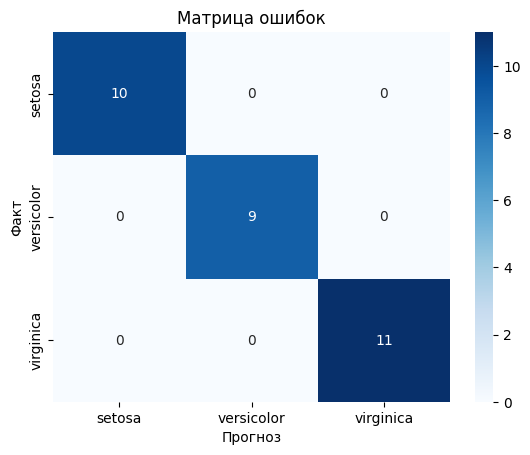

In [8]:
# Отображение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(conf_matrix)
# Визуализация матрицы ошибок
print(len(y_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
Кривая Precision-Recall

In [ ]:
Шаг 1: Импорт необходимых библиотек

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [ ]:
Шаг 2: Загрузка и подготовка набора данных

In [11]:
# Загрузить набор данных
data = load_breast_cancer()
X, y = data.data, data.target
# Преобразуем в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [ ]:
Шаг 3: Разделение на обучение и тестирование

In [12]:
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
Шаг 4: ȁбучение модели дерева решений

In [13]:
# Инициализируем классификатор дерева решений с максимальной глубиной 3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
# Обучите модель на обучающих данных
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
Шаг 5: Предсказания и расчеты Precision и Recall

Precision: 0.9452054794520548
Recall: 0.971830985915493
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Матрица ошибок:
[[39  4]
 [ 2 69]]


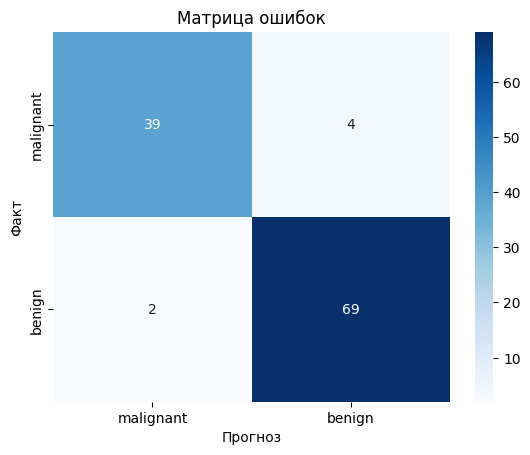

In [14]:
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1] # для каждого значения дает вереоятность
# Рассчитайте precision и recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
# Вывести отчет о классификации
print('Отчет о классификации:')
print(classification_report(y_test, y_pred))
# Вывести матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(conf_matrix)
# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
Шаг 6: Постройте кривую «Precision-Recall»

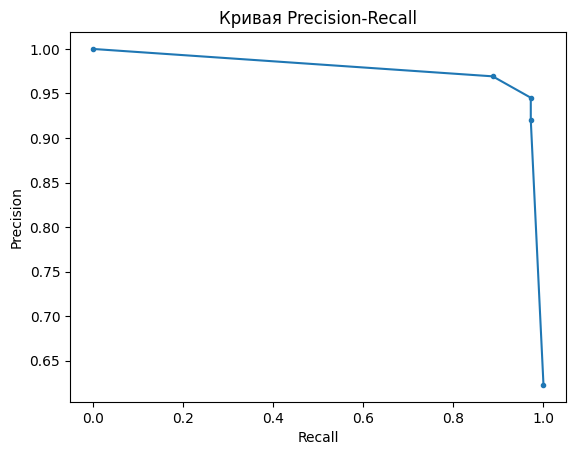

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
[0.98846154 0.         0.         0.98846154 0.98846154 0.
 0.         0.         0.         0.98846154 0.98846154 0.
 0.98846154 0.81818182 0.98846154 0.         0.98846154 0.98846154
 0.98846154 0.         0.98846154 0.98846154 0.         0.98846154
 0.98846154 0.81818182 0.98846154 0.98846154 0.98846154 0.
 0.98846154 0.98846154 0.98846154 0.98846154 0.98846154 0.98846154
 0.15384615 0.98846154 0.         0.98846154 0.98846154 0.
 0.98846154 0.98846154 0.81818182 0.98846154 0.98846154 0.98846154
 0.98846154 0.98846154 0.         0.         0.98846154 0.81818182
 0.98846154 0.98846154 0.98846154 0.         0.         0.98846154
 0.98846154 0.         0.         0.98846154 0.98846154 0.98846154
 0.         0.         0.98846154 0.98846154 0.         0.
 0.

In [20]:
# Рассчитайте кривую Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
# Построить график кривой Precision-Recall
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.show()

thresholds
print(y_pred)
print(y_scores)

In [ ]:
Задание
Примените алгоритм K-Nearest Neighbors (KNN) для классификации несбалансированного набора данных и
вычисления F1-score. Мы будем использовать набор данных Breast Cancer из Scikit-learn, который является слегка
несбалансированным.
Пошаговая реализация:
1. Импорт необходимых библиотек
2. Загрузите и подготовьте набор данных
3. Выполните разделение на обучение и тестирование
4. Обучение KNN-модели
5. Сделайте предсказания
6. Вычислите точность, чувствительность и F1-Score
7. Выведите матрицу ошибок

target
1    357
0    212
Name: count, dtype: int64
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-Score: 0.9444444444444444
Confusion Matrix:
[[38  4]
 [ 4 68]]


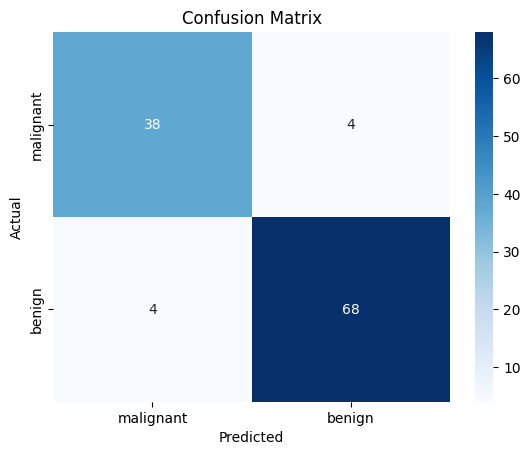

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
print(df['target'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()